## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [1]:
import sys,json
import glob, os
sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")

from stats_group_level import Stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()
/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/glm/__init__.py:56: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  'It may change in any future release of Nilearn.', FutureWarning)


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [18]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels_2ndlevel.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    
#ana2run=["All_frost_VL_gmwm","All_frost_VR_gmwm","All_frost_DL_gmwm","All_frost_DR_gmwm"]
ana2run=["All_frost_D-RL_gmwm"]
#"OneSampleT" "TwoSampT_paired" "TwoSampT_unpaired" 'HigherOrder_paired'

### <font color=#4424D6> II. Initialize class based on this </font>

In [19]:
stats={}
for ana_name in ana2run:
    stats[ana_name]=Stats(config,ana_name,save_ana=True) # initialize the function


************************************** 
Initiate All_frost_D-RL_gmwm analysis
  
> Statistical model: HigherOrder_paired
> Number of participants: 31
> Mask : MNI_GM_3mm_SMC.nii.gz
> Saved here : /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels/summer_2023//2_second_level/HigherOrder_paired/MNI_GM_3mm_SMC/Corr/All_frost_D-RL_gmwm
  


## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Create design matrix

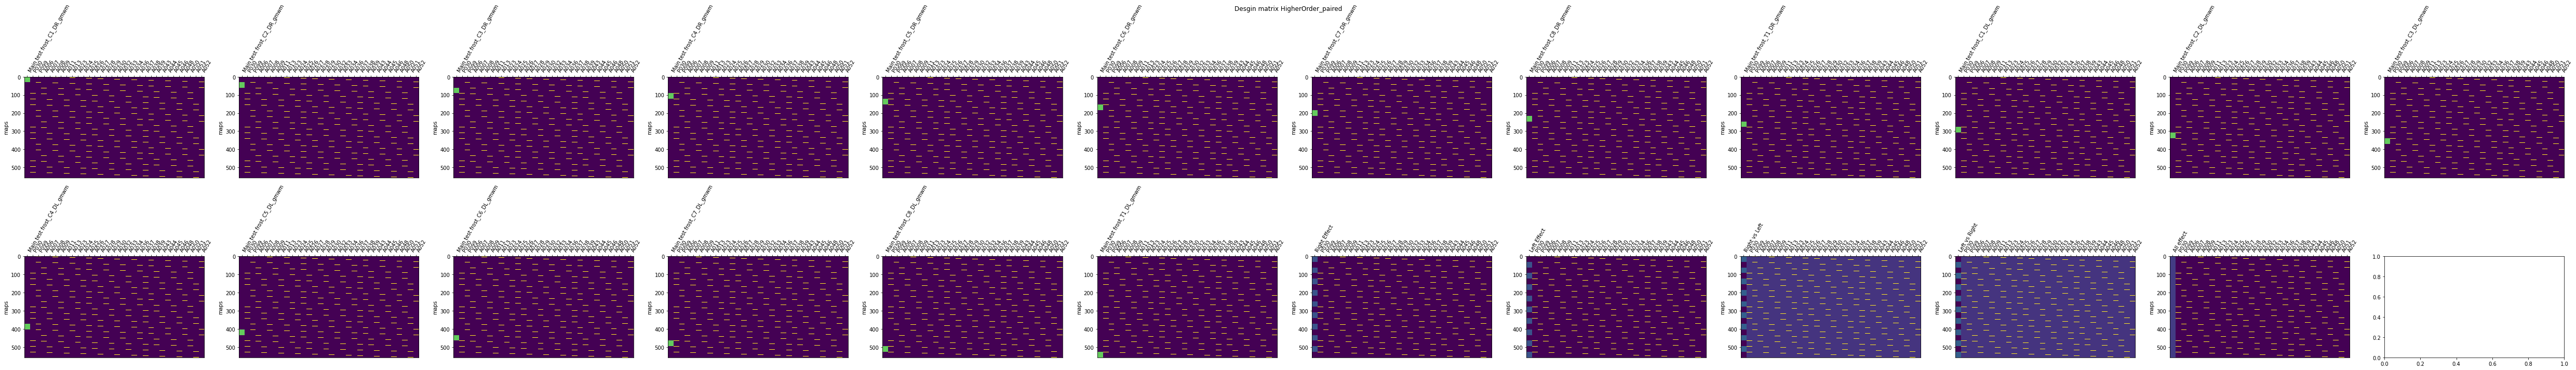

In [20]:
Design_matrix={}
for ana_name in ana2run:
    Design_matrix[ana_name]=stats[ana_name].design_matrix(contrast_name="D-RL_9levels",plot_matrix= True,save_matrix=True) #contrast_name="4quad_9levels",


In [21]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(Design_matrix[ana_name]['Ventral Effect'][0:62])

KeyError: 'Ventral Effect'

## <font color=#B2D732> <span style="background-color: #4424D6"> C/ Create second level model

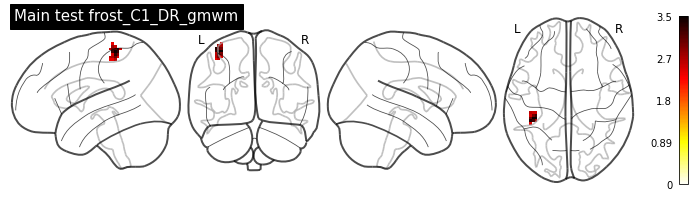

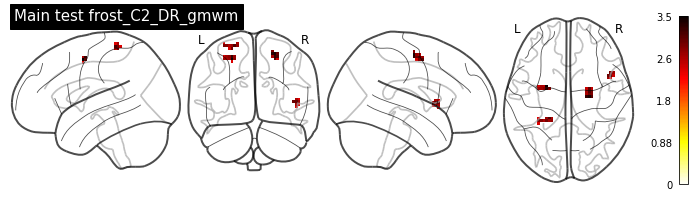

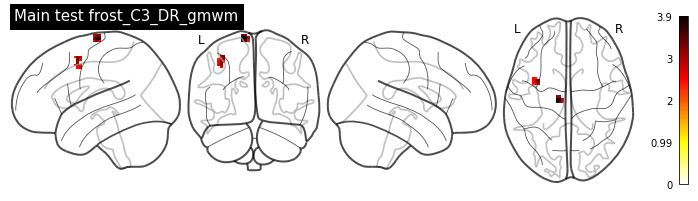

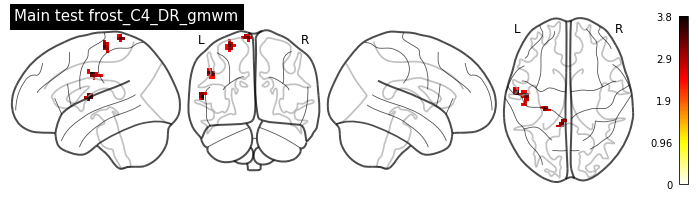

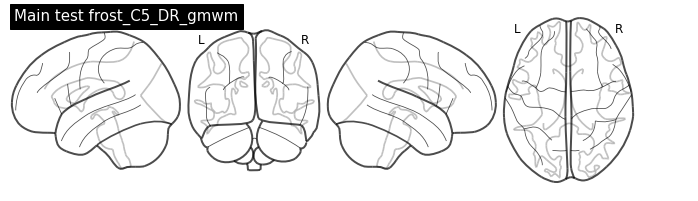

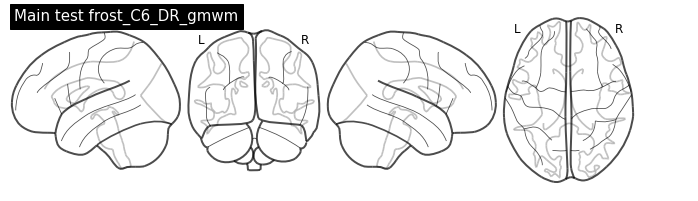

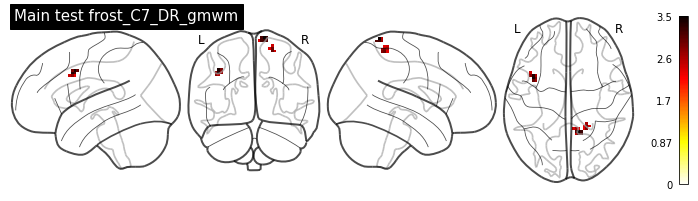

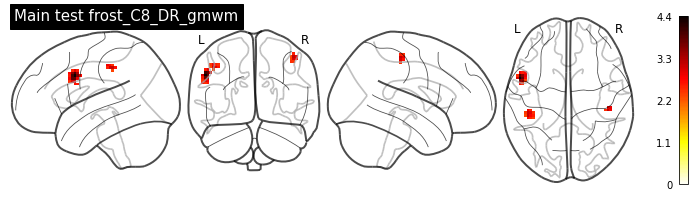

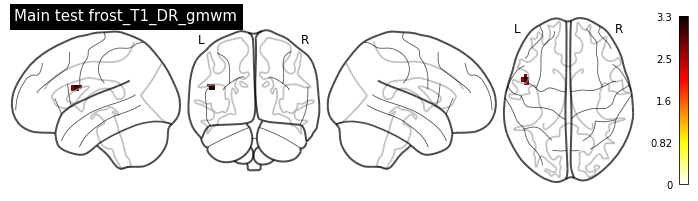

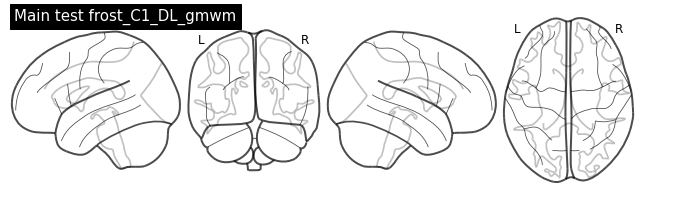

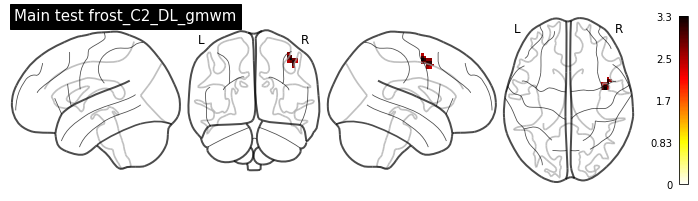

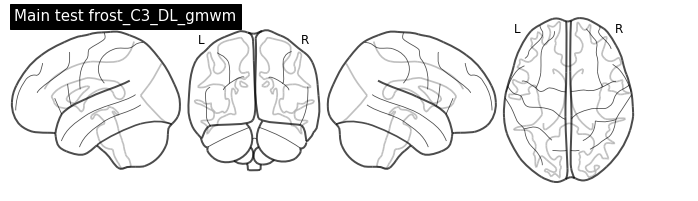

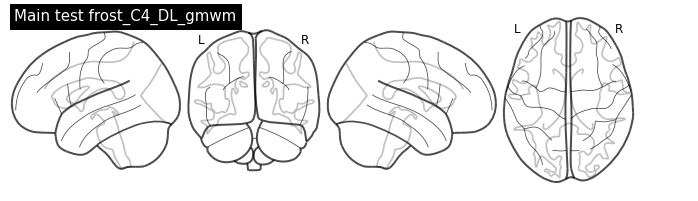

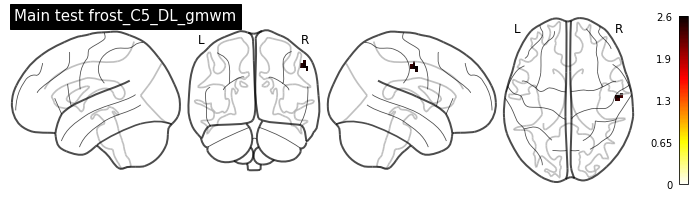

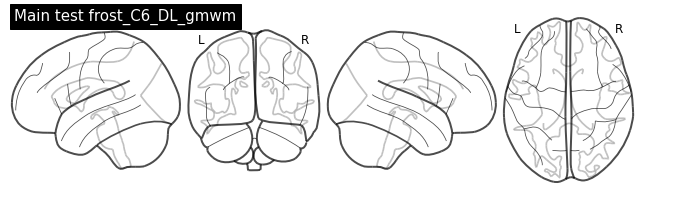

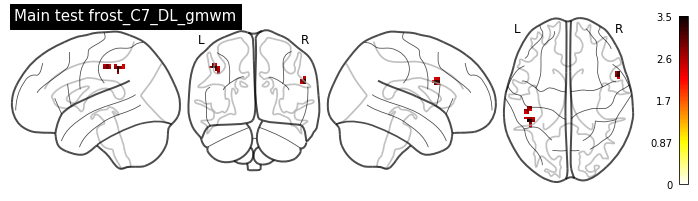

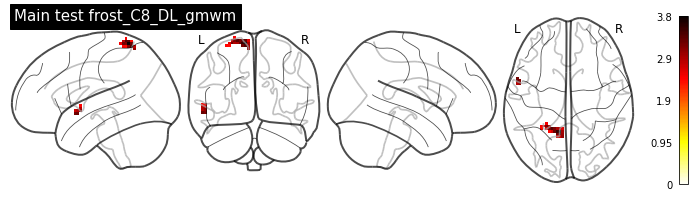

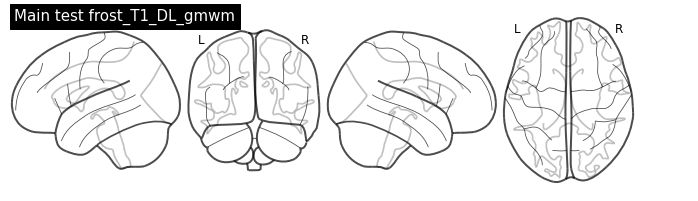

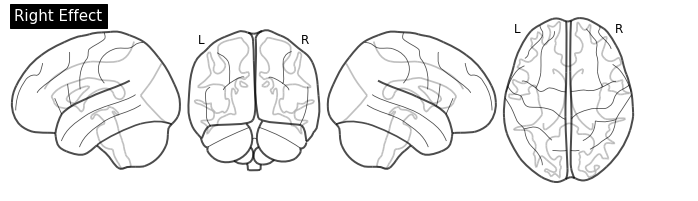

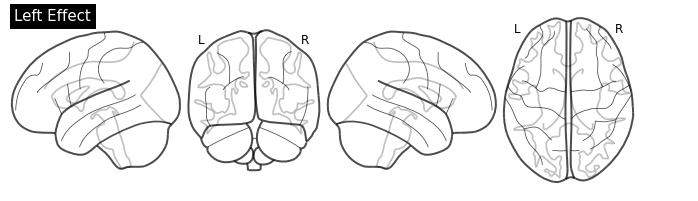

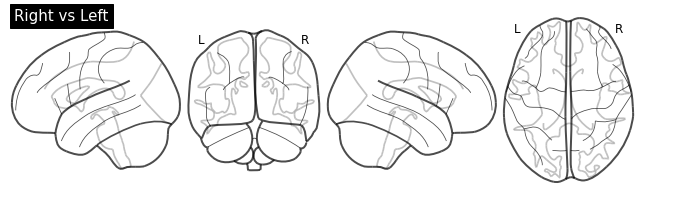

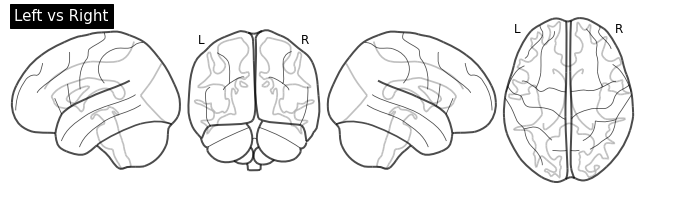

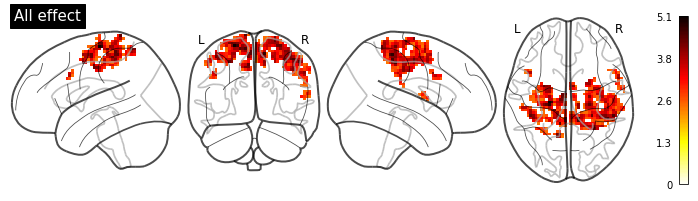

In [23]:
maps_uncorr={}
for ana_name in ana2run:
    maps_uncorr[ana_name]=stats[ana_name].secondlevelmodel(Design_matrix[ana_name],plot_2ndlevel=False,save_img=True) #stats_1T.secondlevelmodel(Design_matrix_1T)
    stats[ana_name].secondlevel_correction(maps_uncorr[ana_name],p_value=0.01,corr="fpr",plot_stats_corr=True,save_img=True) #stats_1T.secondlevelmodel(Design_matrix_1T)


## <font color=#B2D732> <span style="background-color: #4424D6"> D/ Apply statistical correction

In [ ]:
for ana_name in ana2run:
    stats[ana_name].secondlevel_correction(maps_uncorr[ana_name],p_value=0.01,corr="fpr",plot_stats_corr=True,save_img=True) #stats_1T.secondlevelmodel(Design_matrix_1T)